Info in <TCanvas::Print>: png file Hits.png has been created
Info in <TCanvas::Print>: png file Tracks.png has been created


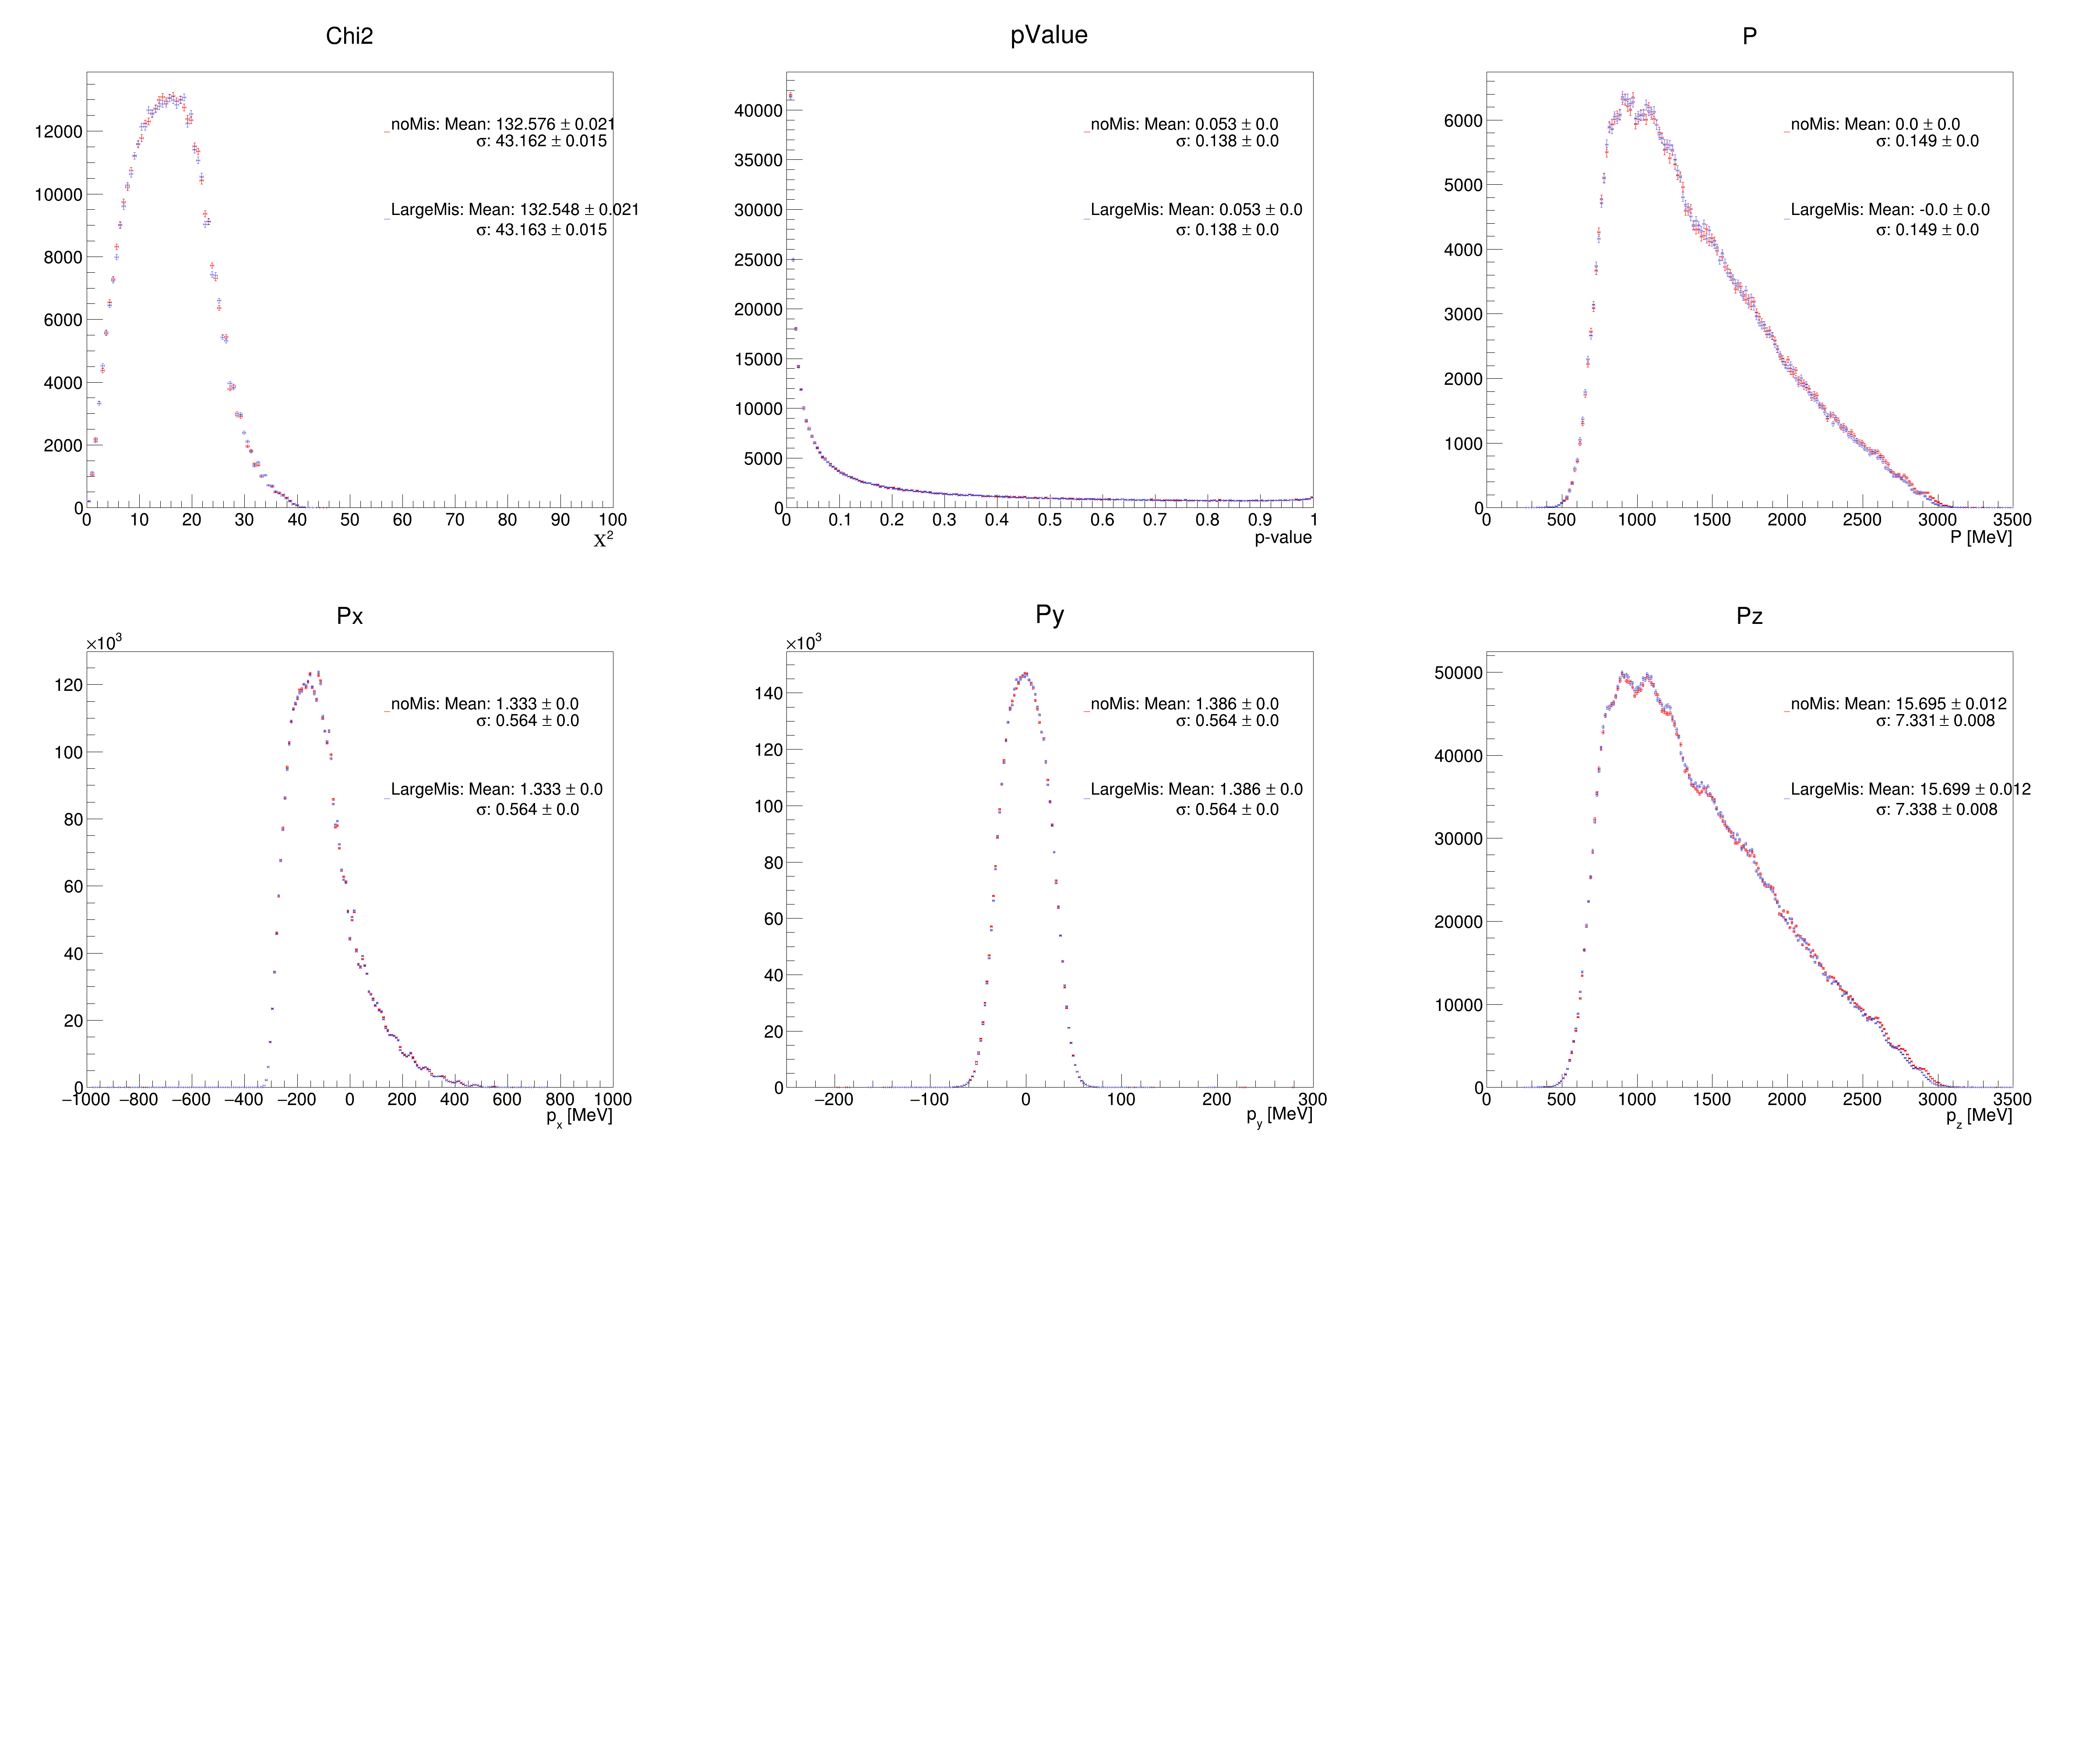

In [11]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1D, TH2D, TF1, TCanvas, TFile, gStyle, TLegend, gROOT

#TFile to open 
scr_nominal = "/Users/gleb/software/alignTrack/mpIIDESY/MDC1_DS1/S12/TrackerAlignment.root"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/Large_MDC1_DS1/S12/TrackerAlignment.root"
stateN = 2 # nominal (0) and shift (1)

#Define histos of interest to loop over 
plotNameHits=["Resolution", "Residual", "Residual UV", "Hit DCA", "Track DCA"] # TFile TH2 names  
plotNameTracks=["Chi2", "pValue", "P", "Px", "Py", "Pz"]
#Define constant paths and labels 
hitsPath="TrackerAlignment/Hits"
trackPath="TrackerAlignment/Tracks"
canvasName=["Hits", "Tracks"]
path=[hitsPath, trackPath]
name=[plotNameHits, plotNameTracks]

#Legen labels (looped over i_state)
legendName = ["noMis", "LargeMis"]
colorLine = [2, 9] # red, blue
colorHisto = [2, 9] # red, blue 
canvasD = [3, 3]

#Open TFiles (looped over i_state)
scrFile_nominal = TFile.Open(scr_nominal)
scrFile_shift = TFile.Open(scr_shift)
fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and shift (1)

#Global empty containers to be filled for vertical or radial (in the main loop)
mean = -1
mean_error = -1 
sd = -1 
sd_error = -1 

legendArray=[] #to hold arrays in a loop and in scope 

###### Plotting ##########
#Plot mode is either hits or tracks: for 2 seperate canvases
for i_plotMode in range(0, len(canvasName)):

    #create main canvas 
    canvas = TCanvas(canvasName[i_plotMode], canvasName[i_plotMode], 4800, 4000)
    canvas.Divide(canvasD[i_plotMode], canvasD[i_plotMode])
    
    #Now get plot name array of hits or tracks
    plotArray=name[i_plotMode] # name of eiter hits or track histors 
    plotPath=path[i_plotMode]  
    
    #Loop over histos in array 
    for i_plot, plot in enumerate(plotArray):
        canvas.cd(i_plot+1) 
        legend =  TLegend( 0.60, 0.87, 0.55, 0.55) # new legend per pad 
        legendArray.append(legend) # stroe all to keep in scope 
        #now compare nominal and shift 
        for i_state in range(0, stateN):
            
            hist_1D=fileName[i_state].Get(plotPath+"/"+plot) #get the histo from either of the files 
            
            hist_1D.SetTitle(plot) 
            hist_1D.SetLineColor(colorHisto[i_state])
            
            #Get stats 
            mean = round(hist_1D.GetMean(), 3)
            mean_error = round(hist_1D.GetMeanError(), 3)
            sd = round(hist_1D.GetRMS(), 3)
            sd_error = round(hist_1D.GetRMSError(), 3)
            
            if (i_state == 0):
                hist_1D.Draw("E1")

            else:
                hist_1D.Draw("E1 same")
            
            #for each state 
            legenValue1 = str(legendName[i_state])+": Mean: "+str(mean)+" #pm "+str(mean_error) 
            legenValue2 = "#sigma: "+str(sd)+" #pm "+str(sd_error)
            legend.AddEntry(hist_1D,"#splitline{"+str(legenValue1)+"}{               "+str(legenValue2)+"}","L") # make appropriate spacing 
        
        #once per plot loop 
        #legendArray[i_plot].SetHeader(plot, "C"); # option "C" allows to center the header
        legendArray[i_plot].Draw("same")


    #Do some final massagin and save to a file
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(0)
    gStyle.SetLegendBorderSize(0)
    gStyle.SetLegendTextSize(0.033)
    canvas.Draw()
    canvas.Print(canvasName[i_plotMode]+".png")